In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:

np.column_stack (([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
# 2차원 배열 생성
fish_data = np.column_stack((fish_length, fish_weight))

In [5]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [6]:
fish_target = np.concatenate((np.ones(35), np.zeros(14))) # 배열 쭉 연결

In [8]:
print(fish_target) #target (answer)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [10]:
# 인덱스 만들어서 직접 섞는 과정을 간편하게 (train_test_split)
from sklearn.model_selection import train_test_split # 훈련, 테스트 나누기 알아서 섞어줌

In [20]:
# stratify에 target data 전달하면 클래스 비율에 맞게 데이터 나눔 /  훈련 데이터가 작거나 특정 클래스 샘플 개수 적을때 유용
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target,stratify=fish_target,  random_state=42) # 시드값42 2개씩 나뉘어 총 4개 배열 반환

In [21]:
print(train_input.shape, test_input.shape) #numpy 배열의 shape 속성으로 입력 데이터 크기 출력

(36, 2) (13, 2)


In [22]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [23]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [24]:
print(kn.predict([[25,150]])) # 알맞게 예측함

[0.]


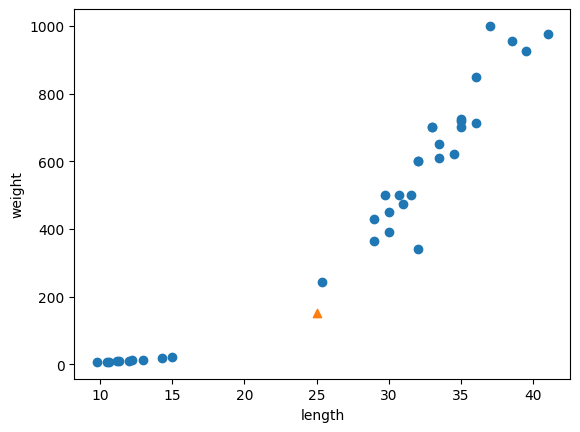

In [26]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1]) # x축에 사용될 length (모든 행 : 첫 번째 열 0) , y축에 사용될 weight 지정 / 산점도에서 x축은 첫번째 열 y축은 두 번째 열
plt.scatter(25,150,marker='^') #marker 매개변수는 모양 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [28]:
distance, indexes = kn.kneighbors([[25,150]])
distance, indexes

(array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
         138.39320793]]),
 array([[21, 33, 19, 30,  1]]))

In [29]:
train_input[indexes]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

In [30]:
train_target[indexes]

array([[1., 0., 0., 0., 0.]])

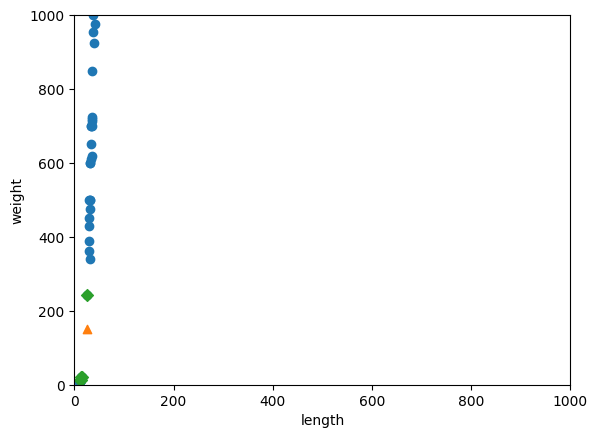

In [34]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^') #marker 매개변수는 모양 지정
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0,1000)) # 두 축의 범위 동일하게 지정 xlim(), ylim() == 스케일(scale) 동일하게 지정
plt.ylim((0,1000))  # 알고리즘이 거리기반 일 때, 특성값을 일정하게 맞춰주어야 한다 => 데이터 전처리 (data preprocessing)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [33]:
distance

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

In [36]:
# 전처리 방법 => 표준점수 (각 특성값이 평균에서 표준편차의 몇 배 만큼 떨어져 있는지)
mean = np.mean(train_input, axis=0) # axis = 행방향으로 각 열의 통계값 계산 (특성마다 scale값이 다르기때문)
std = np.std(train_input, axis=0) # 표준편차

In [37]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [38]:
train_scaled = (train_input - mean) / std # 표준점수 == 각 특성값에서 평균 빼고 표준 편차로 나눔

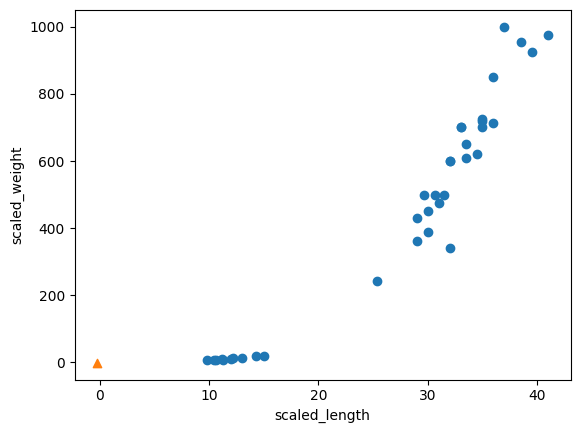

In [42]:
new = ([25,150] - mean) / std # 브로드캐스팅 (p.101) / 길이 와 무게에 따른 각각의 평균과 표준편차를 구해 계산해준다.
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('scaled_length')
plt.ylabel('scaled_weight')
plt.show()

In [41]:
new = ([25,150] - mean) / std
new

array([-0.23012627, -0.94060693])

In [43]:
kn.fit(train_scaled, train_target) # 특성을 표준 점수로 바꾸었다.

KNeighborsClassifier()

In [45]:
kn.score(train_scaled, train_target)

1.0

In [47]:
kn.predict([new])

array([1.])

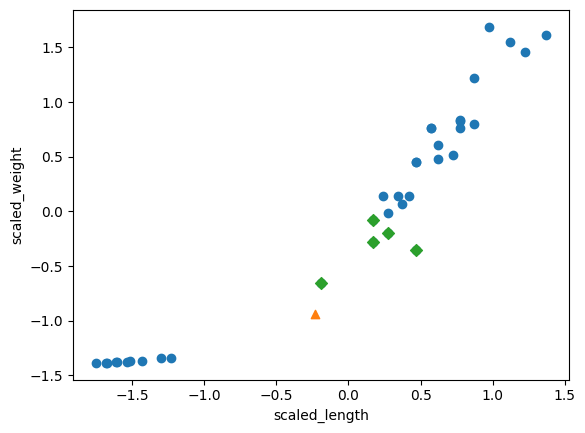

In [49]:
# 스케일이 다른 특성처리 
distance, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('scaled_length')
plt.ylabel('scaled_weight')
plt.show()